In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#filenames = ['location_2020_08_25_14_30_16.csv', 'dgps.csv']

#df = []
#for f in filenames:
#    df.append(pd.read_csv(f))

gps_df = pd.read_csv('location_2020_08_25_14_30_16.csv',
                     sep = ',',
                     parse_dates = [" UserTime"],
                     dayfirst = False)
                     #infer_datetime_format = True
    
dgps_df = pd.read_csv('dgps.csv', sep=',',)

sensor_df = pd.read_csv('2020_08_27_11_59_42.csv',
                       sep = ',',
                       parse_dates = [" time "],
                       dayfirst = False)

In [2]:
gps_df = gps_df.rename(columns=({' UserTime':'datetime', ' Latitude' : 'Latitude', ' Longitude' : 'Longitude', ' Acc' : 'Acc'}))
sensor_df = sensor_df.rename(columns=({' time ' : 'datetime', ' Y' : 'Y', ' Z' : 'Z'}))

In [3]:
print(gps_df.dtypes)
print(sensor_df.dtypes)

Provider                      object
datetime              datetime64[ns]
 SysTime                       int64
Latitude                     float64
Longitude                    float64
 Altitude                    float64
 Bearing                     float64
 BearingAccDegress           float64
Acc                          float64
 Speed                       float64
 SpeedAccPerSecond           float64
dtype: object
X                  float64
Y                  float64
Z                  float64
 Pitch             float64
 Yaw               float64
 Roll              float64
 dt                float64
datetime    datetime64[ns]
dtype: object


In [4]:
print("1번 gps 좌표의 결측 값 개수 :\n", gps_df.isna().sum())
print("2번 dgps 좌표의 결측 값 개수 :\n", dgps_df.isna().sum())

1번 gps 좌표의 결측 값 개수 :
 Provider                0
datetime                0
 SysTime                0
Latitude                0
Longitude               0
 Altitude               0
 Bearing                0
 BearingAccDegress      0
Acc                     0
 Speed                597
 SpeedAccPerSecond    597
dtype: int64
2번 dgps 좌표의 결측 값 개수 :
 datetime         0
latitude_raw     0
longitude_raw    0
latitude         0
longitude        0
dtype: int64


In [5]:
gps_df.fillna("0")

,Provider,datetime,SysTime,Latitude,Longitude,Altitude,Bearing,BearingAccDegress,Acc,Speed,SpeedAccPerSecond
0,gps,2020-08-25 14:30:16,1598333416999,37.325230,126.954787,81.436437,34.978672,1.500,0.007452,0,0
1,gps,2020-08-25 14:30:17,1598333417999,37.325230,126.954786,81.457309,34.978672,1.500,0.006895,0,0
2,gps,2020-08-25 14:30:18,1598333418999,37.325230,126.954785,81.448107,34.978672,1.500,0.008079,0,0
3,network,2020-08-25 14:30:19,1598333419402,37.324568,126.954872,82.299995,0.000000,28.642,0.000000,0,0
4,gps,2020-08-25 14:30:19,1598333419999,37.325230,126.954784,81.450270,34.978672,1.500,0.011029,0,0
...,...,...,...,...,...,...,...,...,...,...,...
592,gps,2020-08-25 14:40:00,1598334000999,37.325128,126.954820,82.200078,165.688171,3.000,3.858111,0,0
593,gps,2020-08-25 14:40:01,1598334001999,37.325103,126.954824,82.146036,171.259369,3.000,2.819053,0,0
594,gps,2020-08-25 14:40:02,1598334002999,37.325090,126.954827,82.161541,171.936371,3.000,1.364371,0,0
595,gps,2020-08-25 14:40:03,1598334003999,37.325090,126.954827,82.205776,171.936371,3.000,0.000000,0,0


In [6]:
#dgps_df.fillna(gps_df1.mean())
#dgps_df.where(pd.notnull(gps_df1), gps_df1.mean(), axis = 'columns')

In [7]:
#df[0]['datetime'].astype('datetime64[ns]')

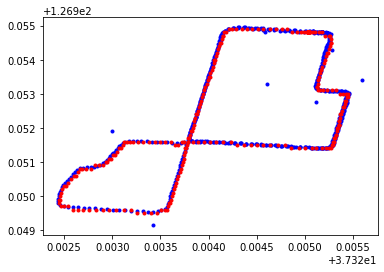

In [8]:
#gps_df.plot(x='Latitude', y='Longitude')
plt.plot(gps_df.Latitude, gps_df.Longitude, 'b .') #10**2  x, y scale 조절
plt.plot(dgps_df.latitude, dgps_df.longitude, 'r .')

Text(0, 0.5, 'longitude')

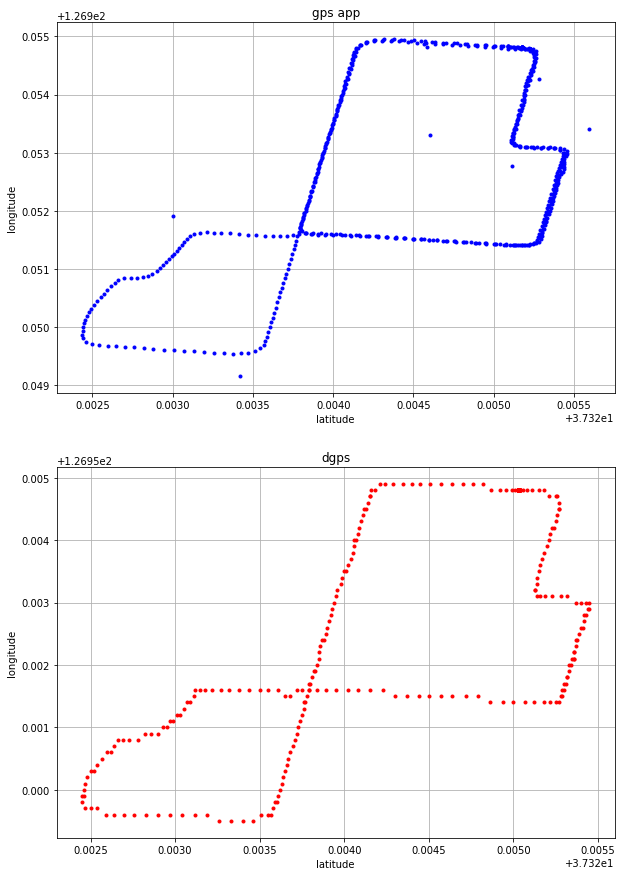

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (10, 15))

ax[0].plot(gps_df.Latitude, gps_df.Longitude, 'b .')
ax[0].grid(True)
ax[0].set_title("gps app")
ax[0].set_xlabel("latitude")
ax[0].set_ylabel("longitude")

ax[1].plot(dgps_df.latitude, dgps_df.longitude, 'r .')
ax[1].grid(True)
ax[1].set_title("dgps")
ax[1].set_xlabel("latitude")
ax[1].set_ylabel("longitude")

#outlier 제거 #xlim, ylim, #x, y sclae 변환 등 필요

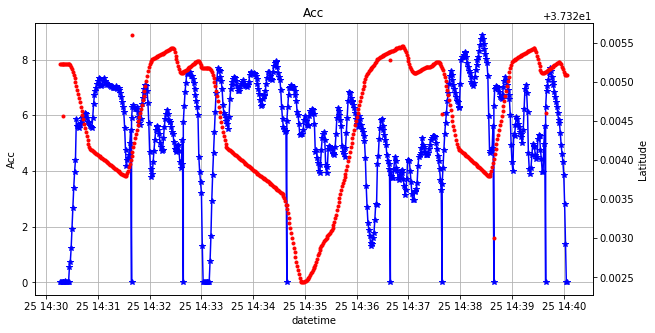

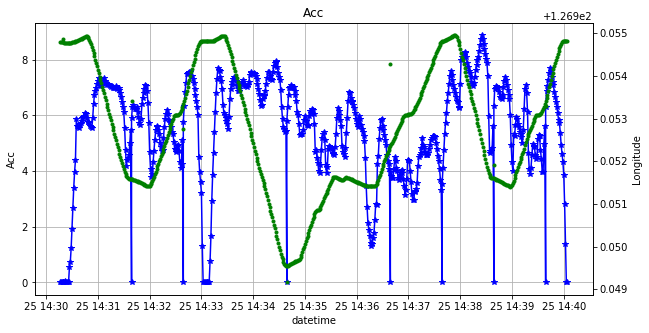

In [10]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(gps_df.datetime, gps_df.Acc, 'b-*')
ax1.grid(True)
ax1.set_title("Acc")
ax1.set_xlabel("datetime")
ax1.set_ylabel("Acc")

ax2 = ax1.twinx()
ax2.set_ylabel("Latitude")
ax2.plot(gps_df.datetime, gps_df.Latitude, 'r .')

fig, ax3 = plt.subplots(figsize = (10, 5))

ax3.plot(gps_df.datetime, gps_df.Acc, 'b-*')
ax3.grid(True)
ax3.set_title("Acc")
ax3.set_xlabel("datetime")
ax3.set_ylabel("Acc")

ax4 = ax3.twinx()
ax4.set_ylabel("Longitude")
ax4.plot(gps_df.datetime, gps_df.Longitude, 'g .')

In [11]:
latitude_mean = gps_df.Latitude.mean()
longitude_mean = gps_df.Longitude.mean()

d = {'Latitude' : [latitude_mean], 'Longitude' : [longitude_mean]}

df_temp = pd.DataFrame(data = d)

gps_temp = gps_df.append(df_temp)

gps_temp.shape

X_temp = gps_temp[['Latitude','Longitude']].values

X_new = np.diff(X_temp, axis=0)
y_new = gps_df['Acc'].values

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_new_scaled = scaler.fit_transform(X_new)

print(X_new_scaled.shape)
print(y_new.shape)

(597, 2)
(597,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new_scaled, 
                                                    y_new, random_state=0)

from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("test set r^2 : {:.2f}".format(reg.score(X_test, y_test)))

test set r^2 : 0.94


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("train score : {:.2f}".format(lr.score(X_train, y_train)))
print("test score : {:.2f}".format(lr.score(X_test, y_test)))

y_pred = lr.predict(X_test)

train score : 0.00
test score : -0.01


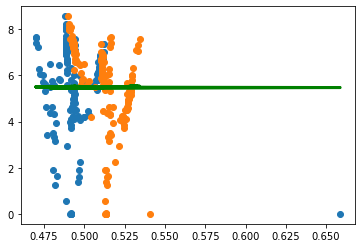

In [15]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_pred, color = 'green', lw=3)

In [16]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(gps_df[['Latitude','Longitude']], 
                                                    gps_df['Acc'], random_state=0)

print(X1_train.shape)
print(X1_test.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

(447, 2)
(150, 2)


In [17]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X1_train_scaled, y1_train)

print("test set r^2 : {:.2f}".format(reg.score(X1_test_scaled, y1_test)))

test set r^2 : 0.34


In [18]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression().fit(X1_train_scaled, y1_train)

print("train score : {:.2f}".format(lr1.score(X1_train_scaled, y1_train)))
print("test score : {:.2f}".format(lr1.score(X1_test_scaled, y1_test)))

y1_pred = lr.predict(X1_test_scaled)

train score : 0.12
test score : 0.19


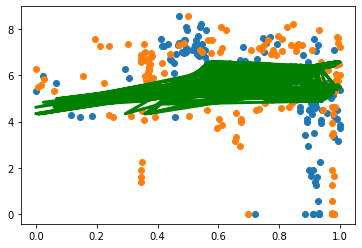

In [19]:
plt.plot(X1_test_scaled, y1_test, 'o')
plt.plot(X1_test_scaled, y1_pred, color = 'green', lw=3)

In [20]:
sensor_df

,X,Y,Z,Pitch,Yaw,Roll,dt,datetime
0,0.0013,0.0018,-0.0012,0.0,-0.0,0.0,0.1,2020-08-27 11:59:09
1,0.0000,0.0018,-0.0006,0.0,-0.0,0.0,0.1,2020-08-27 11:59:09
2,0.0000,0.0024,-0.0012,0.0,-0.0,0.0,0.1,2020-08-27 11:59:09
3,0.0013,0.0006,-0.0012,0.0,-0.0,0.0,0.1,2020-08-27 11:59:10
4,0.0013,0.0012,-0.0012,0.0,-0.0,0.0,0.1,2020-08-27 11:59:10
...,...,...,...,...,...,...,...,...
547,0.1222,-0.1515,-0.1778,23.1,139.8,308.0,0.1,2020-08-27 11:59:42
548,-0.1496,0.1343,-0.0489,23.6,139.6,307.5,0.1,2020-08-27 11:59:42
549,0.0257,0.0965,-0.2267,23.9,138.9,307.6,0.1,2020-08-27 11:59:42
550,0.0214,0.1172,-0.2431,24.3,138.0,307.7,0.1,2020-08-27 11:59:42


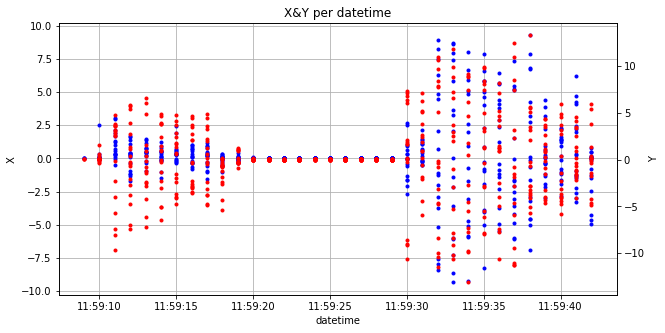

In [21]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(sensor_df.datetime, sensor_df.X, 'b .')
ax1.grid(True)
ax1.set_title("X&Y per datetime")
ax1.set_xlabel("datetime")
ax1.set_ylabel("X")

ax2 = ax1.twinx()
ax2.set_ylabel("Y")
ax2.plot(sensor_df.datetime, sensor_df.Y, 'r .')